In [ ]:
#!pip install tweepy

In [ ]:
#!pip install twitter

In [ ]:
#!pip install textblob

In [ ]:
#!pip install wordcloud

In [ ]:
#!pip install spacy

In [ ]:
#!pip install pip setuptools wheel
#!pip install spacy
#!python -m spacy download en_core_web_sm

In [ ]:
#!python -m spacy download es_core_news_sm

In [ ]:
#!pip install emoji --upgrade
#!pip install contractions
#!pip install nltk

In [1]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import csv
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import emoji
import contractions

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Larissa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
mexicans01= pd.read_csv('Resources/mexicans.csv')
mexicans02= pd.read_csv('Resources/mexicans02.csv')
mexicans03= pd.read_csv('Resources/mexicans03.csv')
mexicans04= pd.read_csv('Resources/mexicans04.csv')
mexicans05= pd.read_csv('Resources/mexicans05.csv')

twitterconcat= [mexicans01, mexicans02, mexicans03, mexicans04, mexicans05]
df = pd.concat(twitterconcat, axis=0)
df.to_csv('Resources/tweetsmex.csv',index=False)

In [29]:
twitter_df = pd.read_csv('Resources/tweetsmex.csv')

In [30]:
print(twitter_df.count())
twitter_df.tail()

Date     76416
Tweet    76416
dtype: int64


,Date,Tweet
76411,20-11-22 1:55,b'They had to go over for me. The Geordie and ...
76412,20-11-22 1:55,b'@joncoopertweets Trump is worst than a terro...
76413,20-11-22 1:54,"b'@GOPChairwoman Great hire a Mexican, they o..."
76414,20-11-22 1:54,b'@SamMMAFanBronx Not going to rank em but giv...
76415,20-11-22 1:54,b'TONY KHAN IS MEXICAN GOD BLESS YOU'


In [31]:
posts = twitter_df["Tweet"]
posts

0        b"@BaelaLayla @TonyHussein4 Trump calling for ...
1        b'Mexicans be so happy when I at least try my ...
2        b"@MacLinx @TonyHussein4 Trump calling for the...
3        b"@Trevor_Allan_1 Trump calling for the death ...
4        b'@MaybeItsSteve @JerBurk @Noahpinion It was a...
                               ...                        
76411    b'They had to go over for me. The Geordie and ...
76412    b'@joncoopertweets Trump is worst than a terro...
76413    b'@GOPChairwoman Great  hire a Mexican, they o...
76414    b'@SamMMAFanBronx Not going to rank em but giv...
76415                b'TONY KHAN IS MEXICAN GOD BLESS YOU'
Name: Tweet, Length: 76416, dtype: object

In [32]:
# Create a dataframe with a column called Tweets
#df = pd.DataFrame(twitter_df["Tweets"])
# Show the first 5 rows of data
#df.head()

#def demojize(tweet):
#    tweet = emoji.demojize(tweet)
#    return tweet

In [33]:
# Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#+', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('(http|https):\/\/\S+', '', text) # Removing hyperlink
    text = re.sub("^b[\'$]", '', text) # b'
    text = re.sub("\:[\s]", ' ', text) # :
    text = re.sub("\+", '', text) # +
    text = re.sub("F\@\$[\s]+", '', text) #F@$
    text = re.sub("\\\[nxf09f928ce29ca89f8cb7]+", '', text) #\
    text = re.sub("\!", '', text) #!
    text = re.sub("\&\[amp]+", '', text) #&
    text = re.sub("\;", '', text) #;
    text = re.sub("\_", '', text) #_
    text = re.sub("\,", '', text) #,
    text = re.sub("\&\amp+", '', text) #&amp
    text = re.sub("\%", '', text) #%
    text = re.sub("^\s", '', text) #&
    text = re.sub("TUTORIALhope", 'TUTORIAL hope', text) #spaces
    text = re.sub("\&[amp\s]+", '', text) #&
    text = re.sub("\.+", '', text) #.
    text = re.sub("\/\/", '', text) #//
    text = re.sub("\|", '', text) #|
    text = re.sub("^b\"", '', text) #.
    text = re.sub("\'", '', text) #.
    text = re.sub("\?", '', text) #.
    text = re.sub("\:", '', text) #.
    text = re.sub("mexicanaLa", 'mexicana La', text) #spaces
    text = re.sub('\w+\d+\w+', '', text) #Removing @mentions
    text = re.sub('\w+\d+', '', text) #Removing @mentions

    
    
    return text

# Clean the tweets
twitter_df["Tweet"] = twitter_df["Tweet"].apply(cleanTxt)

# Show the cleaned tweets
twitter_df["Tweet"]

0         4 Trump calling for the death penalty for dru...
1        Mexicans be so happy when I at least try my Sp...
2         4 Trump calling for the death penalty for dru...
3         Trump calling for the death penalty for drug ...
4          It was a relatively brief period in which an...
                               ...                        
76411    They had to go over for me The Geordie and his...
76412    Trump is worst than a terrorist  He is a treas...
76413      Great  hire a Mexican they out-work Republicans
76414    Not going to rank em but give you  Morocco Leb...
76415                   TONY KHAN IS MEXICAN GOD BLESS YOU
Name: Tweet, Length: 76416, dtype: object

In [34]:
twitter_df["Tweet"]=twitter_df["Tweet"].str.lower()

In [35]:
#print(contractions.contractions_dict)

for k, v in contractions.contractions_dict.items():
    twitter_df["Tweet"] = twitter_df["Tweet"].replace(k, v)

twitter_df.sample(10)

,Date,Tweet
64608,21-11-22 19:46,drac 2 honey half the west is mexican
44834,23-11-22 20:01,cantina los mayas is the nations 1st mexicanwi...
66373,21-11-22 15:30,celebrate the birthday of leopoliti who was bo...
36025,24-11-22 21:32,check out mexicanhistorys video tiktok
8454,11-11-22 15:59,movies in and we finally get some mexicans
47609,23-11-22 12:18,edits if you want authentic mexican food and ...
26817,15-11-22 0:19,my family traces back 6 generations in the sa...
33506,18-11-22 14:13,actual research with the dea does not do shows...
5927,13-11-22 16:09,its what us mexicans say to the sister or gir...
36004,24-11-22 21:36,i also made white cheddar mash potatoes and 3 ...


In [ ]:
#!pip uninstall wasabi -y

#!pip install wasabi==0.9.1

In [36]:
import spacy

In [37]:
nlp = spacy.load("en_core_web_sm")
def normalize(text):
    doc = nlp(text)
    words = [t.orth_ for t in doc if not t.is_punct | t.is_stop]
    lexical_tokens = [t.lower() for t in words if len(t) > 3 and     
    t.isalpha()]
    return lexical_tokens

In [39]:
for i in range(len(twitter_df["Tweet"])):
#for i in twitter_df["Tweet"]:
    twitter_df["Tweet"][i]=normalize(twitter_df["Tweet"][i])
    

In [40]:
#pd.DataFrame(twitter_df.Tweet.tolist(), index= twitter_df.Tweet)
#twitter_df["Tweet"] = pd.DataFrame(twitter_df.Tweet.tolist(), index= twitter_df.Tweet)
#twitter_df["Tweet"]=pd.DataFrame(twitter_df["Tweet"])
#twitter_df.Tweet.tolist().join()
for i in range(len(twitter_df["Tweet"])):
    twitter_df["Tweet"][i]=" ".join(twitter_df["Tweet"][i])

In [41]:
#" ".join(twitter_df["Tweet"][1])

In [42]:
twitter_df

,Date,Tweet
0,17-11-22 2:36,trump calling death penalty drug dealers ethni...
1,17-11-22 2:36,mexicans happy spanish cute
2,17-11-22 2:35,trump calling death penalty drug dealers ethni...
3,17-11-22 2:35,trump calling death penalty drug dealers ethni...
4,17-11-22 2:35,relatively brief period groups allowed poured ...
...,...,...
76411,20-11-22 1:55,geordie mexican pals business months bringing ...
76412,20-11-22 1:55,trump worst terrorist treasonous traitor going...
76413,20-11-22 1:54,great hire mexican work republicans
76414,20-11-22 1:54,going rank morocco lebanon ethiopian mexican h...


In [43]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
twitter_df['Subjectivity'] = twitter_df['Tweet'].apply(getSubjectivity)
twitter_df['Polarity'] = twitter_df['Tweet'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
twitter_df

,Date,Tweet,Subjectivity,Polarity
0,17-11-22 2:36,trump calling death penalty drug dealers ethni...,0.000000,0.000000
1,17-11-22 2:36,mexicans happy spanish cute,0.666667,0.433333
2,17-11-22 2:35,trump calling death penalty drug dealers ethni...,0.000000,0.000000
3,17-11-22 2:35,trump calling death penalty drug dealers ethni...,0.000000,0.000000
4,17-11-22 2:35,relatively brief period groups allowed poured ...,0.466667,0.000000
...,...,...,...,...
76411,20-11-22 1:55,geordie mexican pals business months bringing ...,0.500000,0.000000
76412,20-11-22 1:55,trump worst terrorist treasonous traitor going...,0.500000,-0.500000
76413,20-11-22 1:54,great hire mexican work republicans,0.375000,0.400000
76414,20-11-22 1:54,going rank morocco lebanon ethiopian mexican h...,0.300000,-0.266667


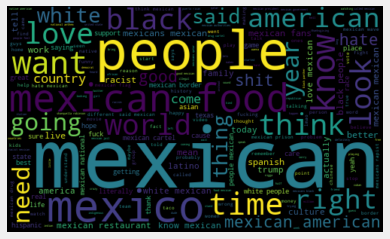

In [44]:
# Word Count
# word cloud visualization
allWords = ' '.join([twts for twts in twitter_df["Tweet"]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [45]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [46]:
#Polarity= {"Negative": -1, "Neutral": 0, "Positive": 1}

twitter_df['Analysis'] = twitter_df['Polarity'].apply(getAnalysis)
# Show the dataframe
twitter_df

,Date,Tweet,Subjectivity,Polarity,Analysis
0,17-11-22 2:36,trump calling death penalty drug dealers ethni...,0.000000,0.000000,Neutral
1,17-11-22 2:36,mexicans happy spanish cute,0.666667,0.433333,Positive
2,17-11-22 2:35,trump calling death penalty drug dealers ethni...,0.000000,0.000000,Neutral
3,17-11-22 2:35,trump calling death penalty drug dealers ethni...,0.000000,0.000000,Neutral
4,17-11-22 2:35,relatively brief period groups allowed poured ...,0.466667,0.000000,Neutral
...,...,...,...,...,...
76411,20-11-22 1:55,geordie mexican pals business months bringing ...,0.500000,0.000000,Neutral
76412,20-11-22 1:55,trump worst terrorist treasonous traitor going...,0.500000,-0.500000,Negative
76413,20-11-22 1:54,great hire mexican work republicans,0.375000,0.400000,Positive
76414,20-11-22 1:54,going rank morocco lebanon ethiopian mexican h...,0.300000,-0.266667,Negative


In [47]:
#twitter_df[twitter_df.Analysis == "Negative"].count()
#twitter_df[twitter_df.Analysis == "Positive"].count()
twitter_df[twitter_df.Analysis == "Neutral"].count()

Date            33447
Tweet           33447
Subjectivity    33447
Polarity        33447
Analysis        33447
dtype: int64

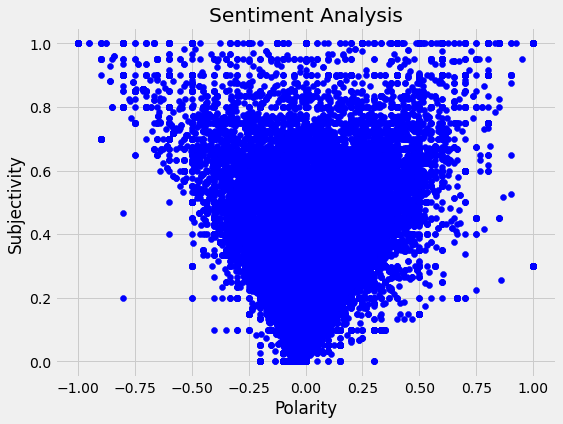

In [48]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, twitter_df.shape[0]):
    plt.scatter(twitter_df["Polarity"][i], twitter_df["Subjectivity"][i], color='Blue') 

# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [49]:
# Print the percentage of positive tweets
ptweets = twitter_df[twitter_df.Analysis == 'Positive']
ptweets = ptweets['Tweet']
ptweets

round( (ptweets.shape[0] / twitter_df.shape[0]) * 100 , 1)

32.1

In [50]:
# Print the percentage of negative tweets
ntweets = twitter_df[twitter_df.Analysis == 'Negative']
ntweets = ntweets['Tweet']
ntweets

round( (ntweets.shape[0] / twitter_df.shape[0]) * 100, 1)

24.1

In [51]:
# Show the value counts
twitter_df['Analysis'].value_counts()

Neutral     33447
Positive    24526
Negative    18443
Name: Analysis, dtype: int64

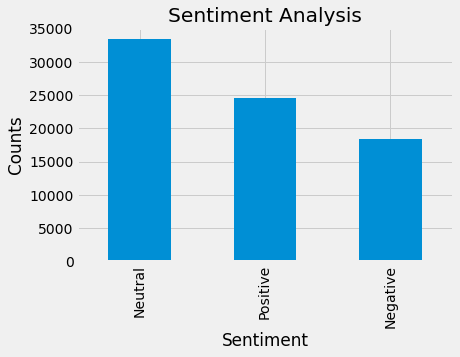

In [52]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
twitter_df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()